In [1]:
"""
                            TP01 -  Ordenação usando Busca em Espaço de Estados
    
    ---------------------------------------------------------------------------------------------
    Autor: Caio Henrique Dias Rocha - 2023.1
    Disciplina: Introdução a Inteligência Artificial - DCC642
    Professor: Luiz Chaimowicz
    Universidade Federal de Minas Gerais - UFMG
    ---------------------------------------------------------------------------------------------

    Este programa implementa os algoritmos de busca em espaços de estados
    * Breadth-first search (BFS),
    * Iterative deepening search (IDS), 
    * Uniform-cost search (UCS),
    * A* search, 
    * Greedy search (G)

    Para executar o programa, execute o comando:
    python3 TP1.py <ALGORITMO> <TAMANHO> <LISTA> [PRINT]
    Onde:
        <ALGORITMO> é o algoritmo a ser executado (B, I, U, A, G)
        <TAMANHO> é o tamanho da lista
        <LISTA> é a lista de inteiros a ser ordenada
        [PRINT] é um parâmetro opcional que, se presente, imprime os estados intermediários
    
    Exemplo:
        python3 TP1.py U 3 3 1 2 PRINT

    O programa imprime a quantidade de estados expandidos, o custo da solução, a lista ordenada final e, 
    se o parâmetro PRINT estiver presente, imprime os estados intermediários.
"""

import sys
import time
from queue import Queue
from queue import PriorityQueue


"""
Check if the list is sorted
"""
def check_sorted(state):
    # Check if list is sorted
    for i in range(len(state) - 1):
        if state[i] > state[i + 1]:
            return False
    return True


"""
Generate all possible successors by swapping two elements
Neighbor elements have cost 2, non-neighbor elements have cost 4
"""
def generate_successors(state, path):
    global expanded_counter
    expanded_counter += 1
    successors = []
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            new_state = state.copy()
            new_state[i], new_state[j] = new_state[j], new_state[i]
            cost = 4
            if i+1 == j or i-1 == j:
                cost = 2
            if new_state not in path:
                successors.append((new_state, cost))
    return successors

"""
Heuristic function
    Returns the estimated cost from state to the goal
    
    Here, we count the number of misplaced elements
"""
def heuristic(state):
    misplaced = 0
    for i in range(len(state) - 1):
        if state[i] > state[i + 1]:
            misplaced += 1
    return misplaced

"""
_____________________________________________________________________________________________
Breadth-first search
"""
def bfs(initial_state, start_time, time_threshold):
    q = Queue()
    q.put((initial_state, [initial_state], 0, 0))
    
    while not q.empty():
        if time.time() - start_time > time_threshold:
            return None, expanded_count, 999
        state, path, expanded_count, cost = q.get()
        if check_sorted(state):
            return path, expanded_count, cost
        successors = generate_successors(state, path)
        for successor, succ_cost in successors:
            q.put((successor, path + [successor], expanded_count + 1, cost + succ_cost))
"""
################################################################################################
"""


"""
_____________________________________________________________________________________________
Iterative deepening search
"""
def ids(initial_state, start_time, time_threshold):
    depth_limit = 0
    while True:
        if time.time() - start_time > time_threshold:
            return None, expanded_count, 999
        result, expanded_count, cost = dls(initial_state, [], 0, 0, depth_limit)
        if result is not None:
            return result, expanded_count, cost
        depth_limit += 1

def dls(state, path, expanded_count, cost, depth_limit):
    # Depth-limited search
    if check_sorted(state):
        return path, expanded_count, cost
    elif depth_limit == 0:
        return None, expanded_count, cost
    else:
        successors = generate_successors(state, path)
        for successor, succ_cost in successors:
            result, expanded_count, new_cost = dls(successor, path + [successor], expanded_count + 1, cost + succ_cost, depth_limit - 1)
            if result is not None:
                return result, expanded_count, new_cost
        return None, expanded_count, new_cost
"""
################################################################################################
"""



"""
_____________________________________________________________________________________________
Uniform-cost search
"""
def ucs(initial_state, start_time, time_threshold):
    q = PriorityQueue()
    # Cost is the priority comparative value
    q.put((0, initial_state, [initial_state], 0))
    visited = []

    while not q.empty():
        if time.time() - start_time > time_threshold:
            return None, expanded_count, 999
        cost, state, path, expanded_count = q.get()
        if check_sorted(state):
            return path, expanded_count, cost
        if state not in visited:
            visited.append(state)
            successors = generate_successors(state, path)
            for successor, succ_cost in successors:
                new_cost = cost + succ_cost
                new_path = path + [successor]
                q.put((new_cost, successor, new_path, expanded_count + 1))

    return None, 0, 0
"""
################################################################################################
"""


"""
_____________________________________________________________________________________________
A* search
"""
def a_star(initial_state, start_time, time_threshold):
    q = PriorityQueue()
    # Cost is the priority comparative value
    q.put((0 + heuristic(initial_state), 0, initial_state, [initial_state], 0))
    visited = []

    while not q.empty():
        if time.time() - start_time > time_threshold:
            return None, expanded_count, 999
        _, g, state, path, expanded_count = q.get()
        if check_sorted(state):
            return path, expanded_count, g
        if state not in visited:
            visited.append(state)
            successors = generate_successors(state, path)
            for successor, succ_cost in successors:
                new_g = g + succ_cost
                new_path = path + [successor]
                q.put((new_g + heuristic(successor), new_g, successor, new_path, expanded_count + 1))

    return None, 0, 0
"""
################################################################################################
"""

"""
_____________________________________________________________________________________________
Greedy search
"""
def greedy(initial_state, start_time, time_threshold):
    # Greedy search
    q = PriorityQueue()
    # Heuristic is the priority comparative value
    q.put((heuristic(initial_state), initial_state, [initial_state], 0, 0))
    visited = []
    new_path_cost = 0

    while not q.empty():
        if time.time() - start_time > time_threshold:
            return None, expanded_count, 999
        h_cost, state, path, expanded_count, path_cost = q.get()
        if check_sorted(state):
            return path, expanded_count, new_path_cost
        if state not in visited:
            visited.append(state)
            successors = generate_successors(state, path)
            for successor, succ_cost in successors:
                new_h = heuristic(successor)
                new_path = path + [successor]
                new_path_cost = path_cost + succ_cost
                q.put((new_h, successor, new_path, expanded_count + 1, new_path_cost))
    return None, 0, 0
"""
################################################################################################
"""

'\n################################################################################################\n'

In [17]:
import time

def Run(alg, items, time_threshold):
    algorithm = alg
    print_path = True
    path = []
    expanded_count = 0
    cost = 0

    # Run the algorithm (B, I, U, A, G),
    global expanded_counter
    expanded_counter = 0
    start_time = time.time()
    if algorithm == "B":
        print("Running BFS for items:", items)
        path, expanded_count, cost = bfs(items, start_time, time_threshold)
    elif algorithm == "I":
        print("Running IDS for items:", items)
        path, expanded_count, cost = ids(items, start_time, time_threshold)
    elif algorithm == "U":
        print("Running UCS for items:", items)
        path, expanded_count, cost = ucs(items, start_time, time_threshold)
    elif algorithm == "A":
        print("Running A* for items:", items)
        path, expanded_count, cost = a_star(items, start_time, time_threshold)
    elif algorithm == "G":
        print("Running Greedy for items:", items)
        path, expanded_count, cost = greedy(items, start_time, time_threshold)
        
    end_time = time.time()


    if path is not None:
        if path[-1] != sorted(items):
            print("While running (", algorithm, ") the path found is not a solution")
            print("Path:", path)
            print("Last state:", path[-1], "\n")

    time_taken = end_time - start_time
    print("Time taken:", time_taken, "\n")

    return time_taken, expanded_count, path, cost

In [27]:
for n in generate_successors([1,4,5,9,3],[]):
    for s, x in n:
        print(s, x)

[4, 1, 5, 9, 3] 2
[5, 4, 1, 9, 3] 4
[9, 4, 5, 1, 3] 4
[3, 4, 5, 9, 1] 4
[1, 5, 4, 9, 3] 2
[1, 9, 5, 4, 3] 4
[1, 3, 5, 9, 4] 4
[1, 4, 9, 5, 3] 2
[1, 4, 3, 9, 5] 4
[1, 4, 5, 3, 9] 2


In [40]:
global expanded_counter
time_taken, expanded_count = Run("G", [8, 3, 1, 4, 6, 5, 8, 7, 2], 1)
expanded_counter, expanded_count

(5, 5)

Running BFS for items: [2, 3, 1]
Time taken: 0.00018095970153808594 

Running IDS for items: [2, 3, 1]
Time taken: 1.71661376953125e-05 

Running UCS for items: [2, 3, 1]
Time taken: 4.315376281738281e-05 

Running A* for items: [2, 3, 1]
Time taken: 3.743171691894531e-05 

Running Greedy for items: [2, 3, 1]
Time taken: 2.8371810913085938e-05 

Running BFS for items: [2, 3, 1, 4]
Time taken: 7.700920104980469e-05 

Running IDS for items: [2, 3, 1, 4]
Time taken: 1.7404556274414062e-05 

Running UCS for items: [2, 3, 1, 4]
Time taken: 0.0005600452423095703 

Running A* for items: [2, 3, 1, 4]
Time taken: 6.699562072753906e-05 

Running Greedy for items: [2, 3, 1, 4]
Time taken: 3.886222839355469e-05 

Running BFS for items: [5, 3, 2, 4, 1]
Time taken: 0.0012395381927490234 

Running IDS for items: [5, 3, 2, 4, 1]
Time taken: 5.1975250244140625e-05 

Running UCS for items: [5, 3, 2, 4, 1]
Time taken: 0.00032901763916015625 

Running A* for items: [5, 3, 2, 4, 1]
Time taken: 0.0002727508

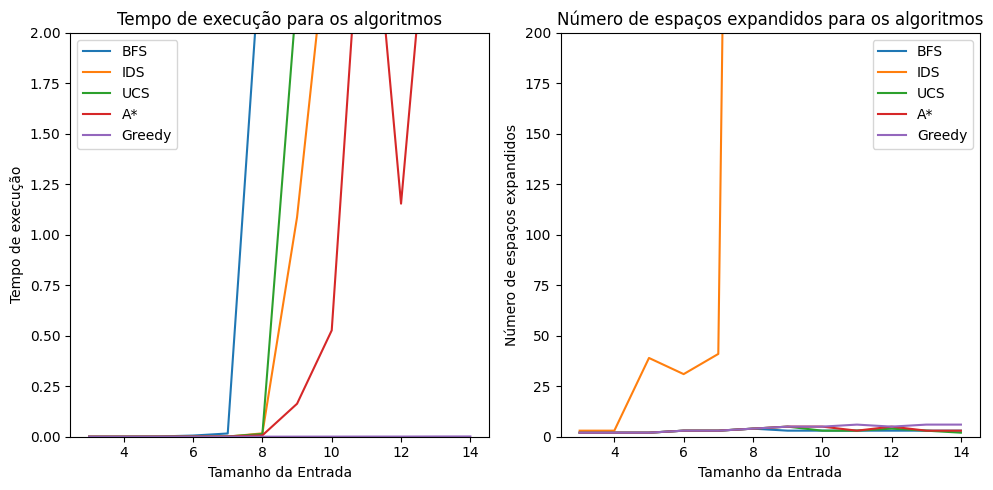

In [13]:
import matplotlib.pyplot as plt

# Generate some data
items_list = [
    [2, 3, 1],
    [2, 3, 1, 4], 
    [5, 3, 2, 4, 1],
    [2, 3, 1, 4, 6, 5],
    [2, 3, 1, 4, 6, 5, 7],
    [2, 3, 1, 4, 6, 5, 8, 7],
    [8, 3, 1, 4, 6, 5, 8, 7, 2],
    [8, 3, 1, 4, 6, 5, 8, 7, 2, 9],
    [8, 10, 1, 4, 6, 5, 8, 7, 2, 9, 3],
    [8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15],
    [8, 4, 1, 3, 6, 5, 8, 8, 2, 9, 10, 15, 12],
    [8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11],
]
algorithms = ["B", "I", "U", "A", "G"]
alg_names = ["BFS", "IDS", "UCS", "A*", "Greedy"]
time_taken = [[] for _ in range(len(algorithms))]
expanded_count = [[] for _ in range(len(algorithms))]
time_threshold = 3

for items in items_list:
    for i, alg in enumerate(algorithms):
        #print("Running", alg, "with items:", items)
        expanded_counter = 0
        t, e = Run(alg, items, time_threshold)
        time_taken[i].append(t)
        expanded_count[i].append(e)

# Create two subplots with a width of 10 inches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the time taken data for each algorithm
for i, alg in enumerate(alg_names):
    ax1.plot([len(items) for items in items_list], time_taken[i], label=alg)
ax1.set_xlabel("Tamanho da Entrada")
ax1.set_ylabel("Tempo de execução")
ax1.set_title("Tempo de execução para os algoritmos")
ax1.legend()
ax1.set_ylim([0, 2])

# Plot the expanded count data for each algorithm
for i, alg in enumerate(alg_names):
    ax2.plot([len(items) for items in items_list], expanded_count[i], label=alg)
ax2.set_xlabel("Tamanho da Entrada")
ax2.set_ylabel("Número de espaços expandidos")
ax2.set_title("Número de espaços expandidos para os algoritmos")
ax2.legend()
ax2.set_ylim([0, 200])

# Show the plots
plt.tight_layout()
plt.show()


In [24]:
Run("G", [8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11,8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11,8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11], 5)

Running Greedy for items: [8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11, 8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11, 8, 3, 1, 4, 6, 5, 8, 7, 2, 9, 10, 15, 12, 11]
Time taken: 0.4781348705291748 



(0.4781348705291748,
 88,
 [[8,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11],
  [2,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   8,
   9,
   10,
   15,
   12,
   11],
  [2,
   3,
   1,
   4,
   5,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   5,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   6,
   8,
   7,
   8,
   9,
   10,
   15,
   12,
   11],
  [2,
   3,
   1,
   4,
   5,
   5,
   5,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   8,
   3,
   1,
   4,
   6,
   8,
   8,
   7,
   2,
   9,
   10,
   15,
   12,
   11,
   